# Lab 3

## Singular value decomposition and it's application

### Compressing data using SVD = low-rank matrix approximation

**Technical details (SVD in Python, data visualization)**

I will use the following way to get SVD in Python:

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Considering that it is difficult to draw conclusions without data visualization, I will use the matplotlib and seaborn libraries and it's basic plotting fuctions such as `plot`, `hist`, `scatter` and `bar`.

### Task 1. Data compression

The process of importing a photo:

In [32]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Drawing it:

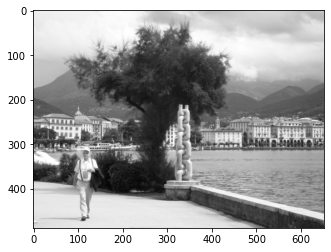

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Now we are going to calculate singular value decomposition

In [34]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1.** Now we would like to see how quickly the values of the diagonal elements of $\Sigma$ decrease:

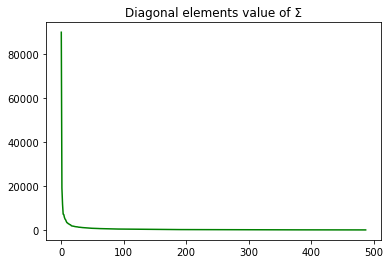

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.plot(S, 'g')
plt.title('Diagonal elements value of Σ')
plt.show()

It seems that they decrease quickly enough and there is a hope that the first few components will give a picture close to the original one.

**2.** Now let's try to visualize the most dominant singular value (the first one).

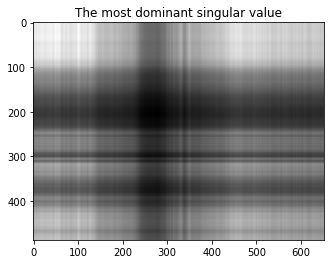

In [36]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
First = np.array([U[:, 0]]).T @ np.array([VT[0, :]]) * S[0]
plt.imshow(First, cmap='gray')
plt.title('The most dominant singular value')
plt.show()

Basically, the picture matched my expectations -- it would be surprising if an approximation of rank 1 was enough to render the image. Note, however, that the brightness and contrast of the picture are transmitted correctly. You can notice the effect by the dark stripe closer to the center of the picture - this is a tree from the original image.

**3.** Now we will try to visualize 20 largest singular values; 50 largest singular values; 20th to 100th singular values and 20th to the last singular values.

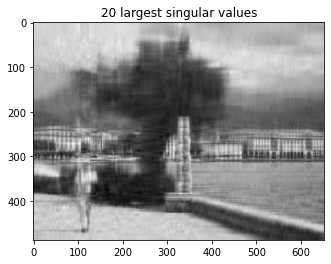

In [37]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Second = U[:,0:20] @ np.diag(S[0:20]) @ VT[0:20,:] 
plt.imshow(Second, cmap='gray')
plt.title('20 largest singular values')
plt.show()

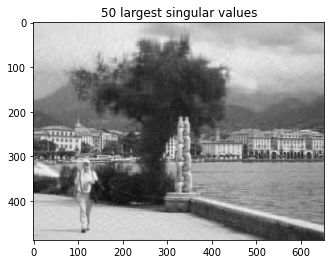

In [38]:
Third = U[:,0:50] @ np.diag(S[0:50]) @ VT[0:50,:] 
plt.imshow(Third, cmap='gray')
plt.title('50 largest singular values')
plt.show()

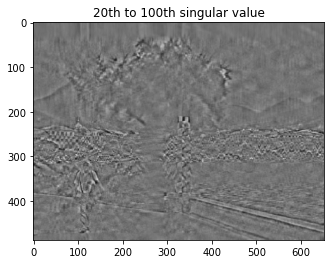

In [39]:
Fourth = U[:,20:100] @ np.diag(S[20:100]) @ VT[20:100,:] 
plt.imshow(Fourth, cmap='gray')
plt.title('20th to 100th singular value')
plt.show()

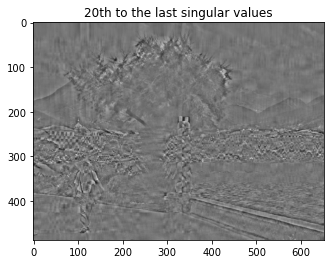

In [40]:
Fourth = U[:,20:] @ np.diag(S[20:]) @ VT[20:,:] 
plt.imshow(Fourth, cmap='gray')
plt.title('20th to the last singular values')
plt.show()

As we can see, the first image correctly reproduces the picture, but not yet clear enough. The second is also not quite clear, but more details of the original picture are visible. The last two visualizations are absolutely unrepresentative, without the first twenty singular values they lose contrast and do not convey where the original picture was light or dark.

**4.** Which singular values we have to take to reproduce the original picture good enough?

Previous experiments have shown us that the first twenty singular values must be taken to convey the basic contrast and brightness of the picture. The following values should be added depending on the definition of "good enough" and the picture itself. In this case, it seems to me that fifty components is not enough and it is worth increasing the number to one hundred. The picture will look like this:

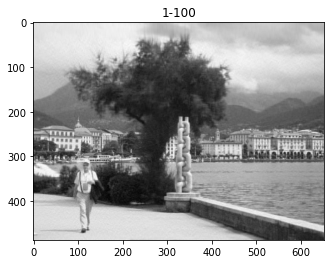

In [41]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Optimal = U[:,0:100] @ np.diag(S[0:100]) @ VT[0:100,:] 
plt.imshow(Optimal, cmap='gray')

plt.title('1-100')
plt.show()

**5. [0.15 балла]** Calculations on how much less memory is required to store the new image compared to the original.

It is $n \cdot m = 488 \cdot 653 = 318664$  units of memory required to store to store the original matrix A.

To store the new image we need
 $n \cdot r + m \cdot r + r = 488 \cdot 100 + 653 \cdot 100 + 100 = 114200$ units of memory, that is almost three times less.

In [42]:
print("Matrix A: (n, m) =", img.shape)
print("Theoretically it is", 318664 / 114200, "times less required.")

Matrix A: (n, m) = (488, 653)
Theoretically it is 2.790402802101576 times less required.


**6.**  Calculations on how much less memory is actually occupied by the original matrix and the components of its singular value decomposition.

To answer this question, let's use the `nbytes` function, which calculates how much memory the elements of the matrix consume. We know from previous experience that elements are not all the information that is stored about the matrix in the computer's memory. But this seems to be the best option, since for example `sys.getsizeof` returned an unrealistic number of bytes - it only counts the memory consumption directly associated with the object, and not the memory consumption of the objects that the object refers to. So I can only hope that the additional information about the object does not take up very much memory. It seems, again based on experience, this is a realistic assumption. In general, apart from this additional information about the matrix, everything is fine and our assumptions are correct:

In [43]:
Memory_input = img.nbytes
Memory_output = U[:,0:100].nbytes + S[0:100].nbytes + VT[0:100,:].nbytes

print("Original matrix:", Memory_input)
print("Components of its singular value decomposition:", Memory_output)
print("It takes", Memory_input / Memory_output, "times less memory.")

Original matrix: 2549312
Components of its singular value decomposition: 913600
It takes 2.790402802101576 times less memory.


### Task 2. Geometric meaning of SVD. Data visualization

**Data visualization**

Above, we discussed that the largest singular values represent the features, the meanings of which, let's say, are the most diverse. Often (though not always) they are the ones that carry the most important information about a dataset. And if you take the first two or three, then you can draw a dataset and look at it - and, possibly, find some kind of structure.

We will load the handwritten digits dataset [MNIST](http://yann.lecun.com/exdb/mnist/) using `dsklearn.datasets.load_digits()`  function. 

0


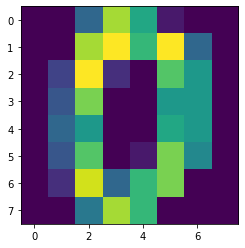

In [44]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))
plt.show()

**5.** Let's calculate SVD of `digits.data` matrix:

In [45]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U, S, VT = svd(digits.data, full_matrices=False)

**6.** Now I will visualize the data by projecting it onto a plane so that the coordinates of the points correspond to the first two new features.

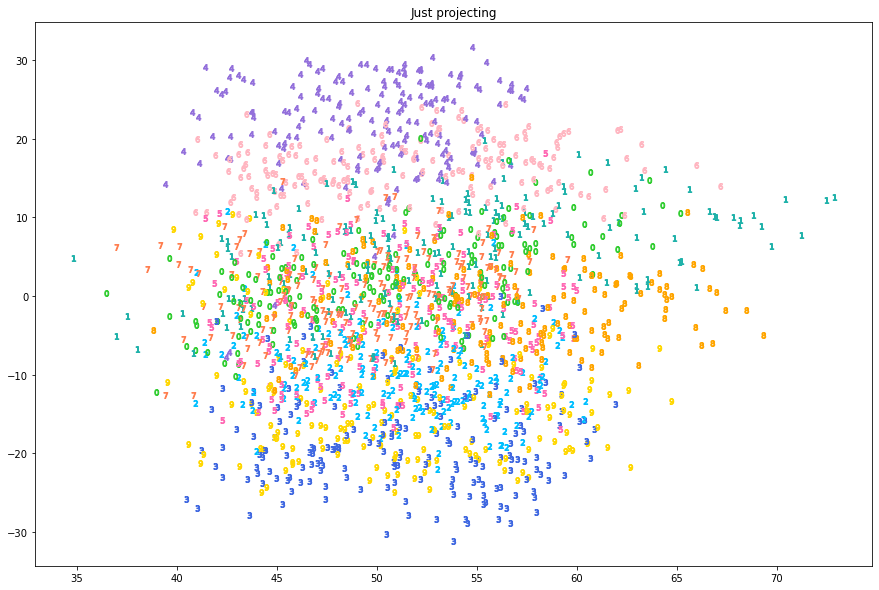

In [46]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Pr = (U @ np.diag(S))[:,:2]

colors = ['limegreen','lightseagreen','deepskyblue','royalblue','mediumpurple','hotpink','lightpink','coral','orange', 'gold']
number = ['$0$','$1$','$2$','$3$','$4$','$5$','$6$','$7$','$8$','$9$']
plt.figure(figsize=(15, 10))

for i in range(Pr.shape[0]):
    plt.scatter(Pr[i, 0], Pr[i, 1], c = colors[digits.target[i]], marker = number[digits.target[i]])
    
plt.title('Just projecting')
plt.show()

This picture has no clear structure and is not what we expected to see.

**7.** To fix this, let's subtract its mean value from each feature, SVD again and draw colored dots one more time.

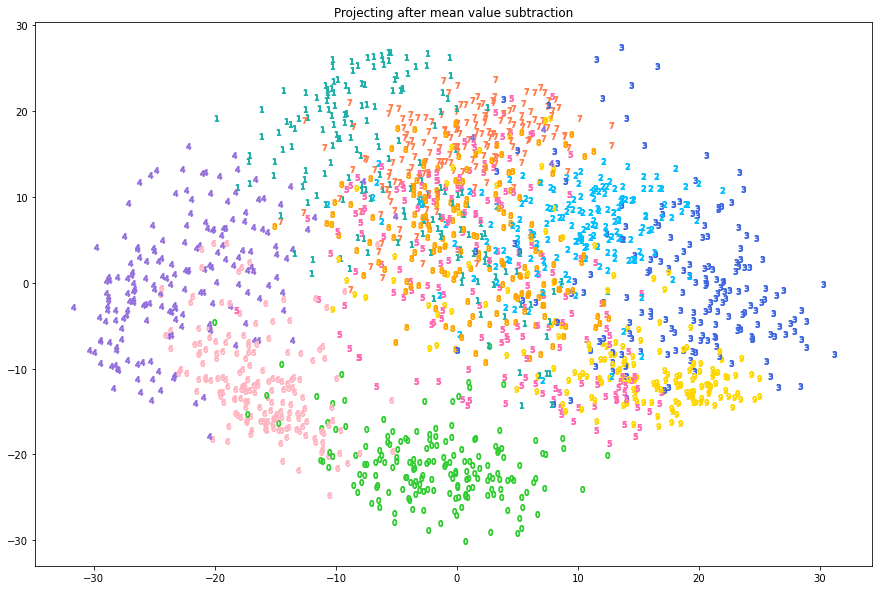

In [47]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
NewData = digits.data - digits.data.mean(axis=0)
U, S, VT = svd(NewData, full_matrices=False)
Pr = (U @ np.diag(S))[:,:2]

plt.figure(figsize=(15, 10))

for i in range(Pr.shape[0]):
    plt.scatter(Pr[i, 0], Pr[i, 1], c = colors[digits.target[i]], marker = number[digits.target[i]])
    
    
plt.title('Projecting after mean value subtraction')
plt.show()

**8.** Comparison. Why the second picture is better.

In the first picture, it is difficult to see some kind of system, the elements are not divided into subsets (elements corresponding to the same number do not clump together). The second visualization favorably differs precisely by the grouping of objects into subsets (clusters).

**9.** Comparison of SVD's performance with Another Dimension Reduction Method: [Gaussian Random Projection](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

First, I tried to assess how much the randomness affects the result. The next two examples show that the effect is very strong. In the first of the cases presented below, it is difficult to talk about some kind of partition as a whole, in the second it is noticeable.

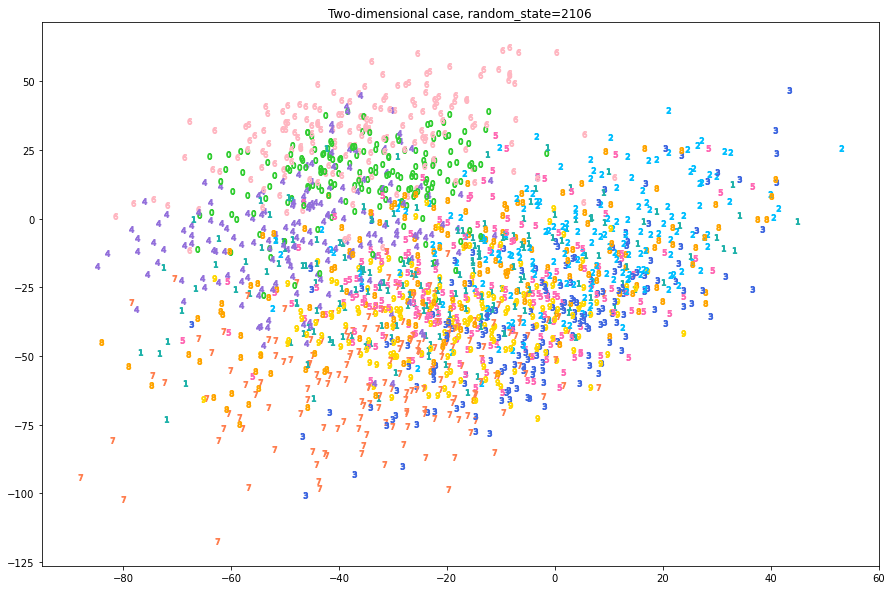

In [48]:
from sklearn.random_projection import GaussianRandomProjection
transformer = GaussianRandomProjection(n_components = 2, random_state=2106)
X_new = transformer.fit_transform(digits.data, digits.target)

plt.figure(figsize=(15, 10))

for i in range(X_new.shape[0]):
    plt.scatter(X_new[i, 0], X_new[i, 1], c = colors[digits.target[i]], marker = number[digits.target[i]])
    
plt.title('Two-dimensional case, random_state=2106')
plt.show()

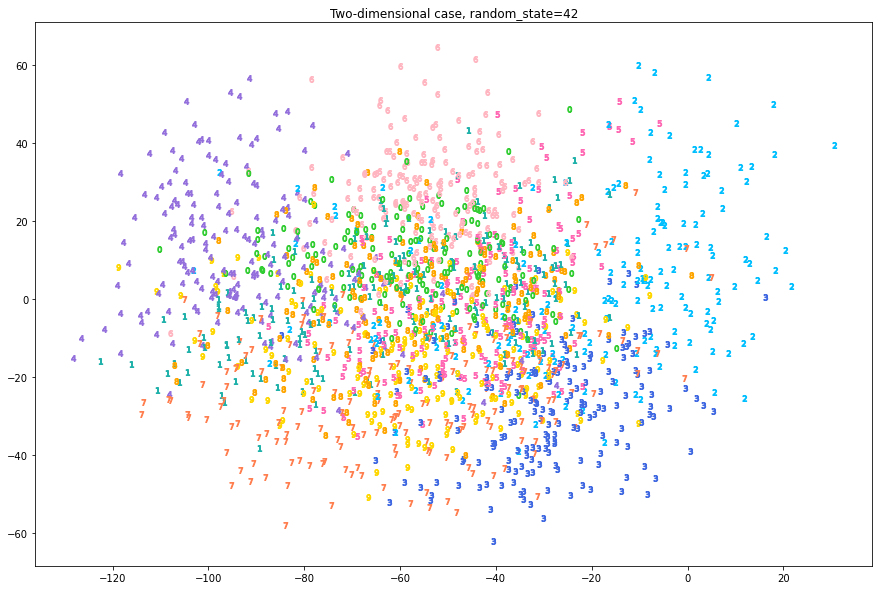

In [49]:
from sklearn.random_projection import GaussianRandomProjection
transformer = GaussianRandomProjection(n_components = 2, random_state=42)
X_new = transformer.fit_transform(digits.data, digits.target)

plt.figure(figsize=(15, 10))

for i in range(X_new.shape[0]):
    plt.scatter(X_new[i, 0], X_new[i, 1], c = colors[digits.target[i]], marker = number[digits.target[i]])
    
plt.title('Two-dimensional case, random_state=42')
plt.show()

Let's check whether it will be better if we do all the manipulations with NewData - a matrix where its average value was subtracted from each feature.

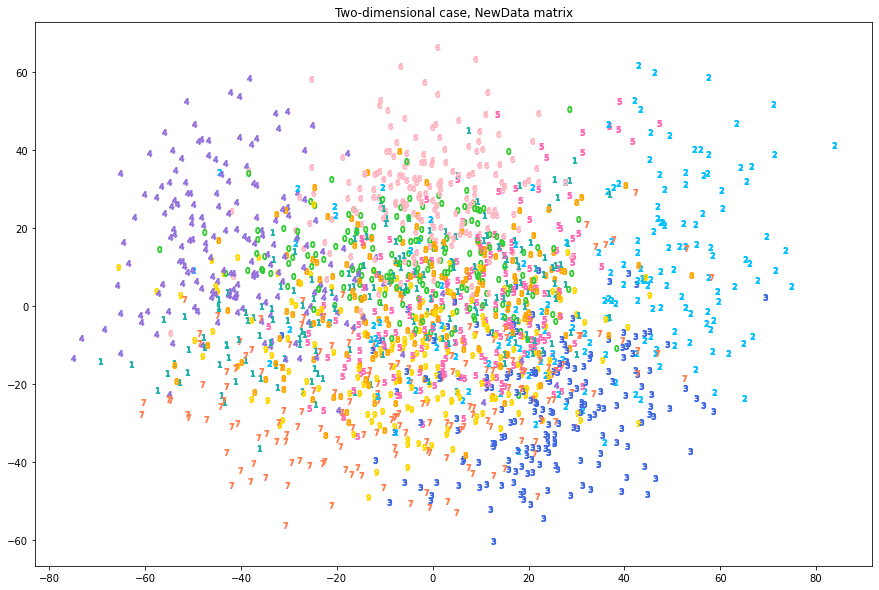

In [50]:
transformer = GaussianRandomProjection(n_components = 2, random_state=42)
X_new = transformer.fit_transform(NewData, digits.target)

plt.figure(figsize=(15, 10))

for i in range(X_new.shape[0]):
    plt.scatter(X_new[i, 0], X_new[i, 1], c = colors[digits.target[i]], marker = number[digits.target[i]])
    
plt.title('Two-dimensional case, NewData matrix')
plt.show()

Nothing changed :)
Now let's try to switch to the three-dimensional dimension:

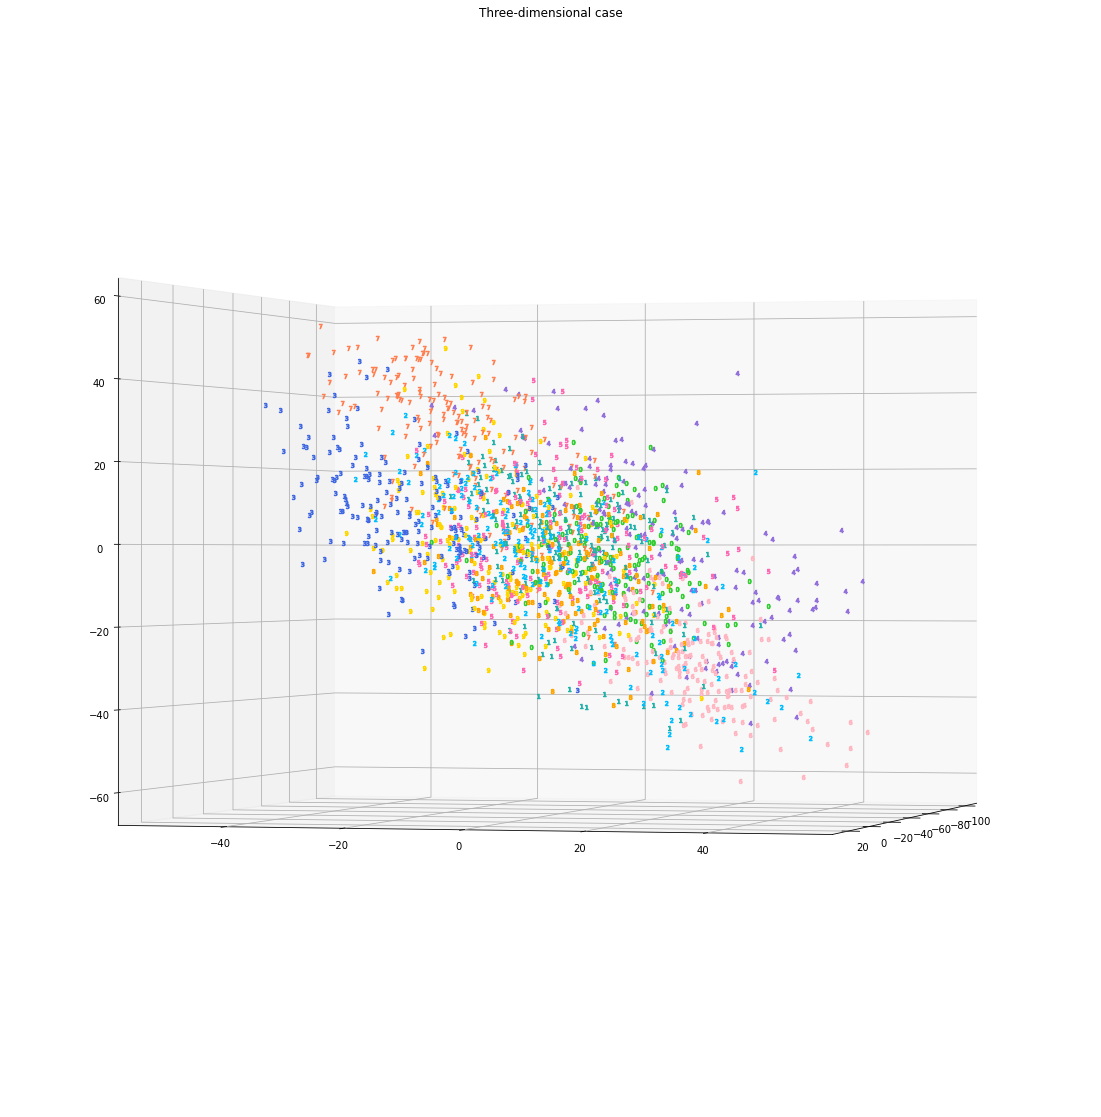

In [51]:
from sklearn.random_projection import GaussianRandomProjection
transformer = GaussianRandomProjection(n_components = 3, random_state=42)
X_new = transformer.fit_transform(digits.data, digits.target)


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')


for i in range(X_new.shape[0]):
    ax.scatter(X_new[i, 0], X_new[i, 1], X_new[i, 2], c = colors[digits.target[i]], marker = number[digits.target[i]])
  
ax.view_init(elev=0., azim=15)
plt.title('Three-dimensional case')
plt.show()

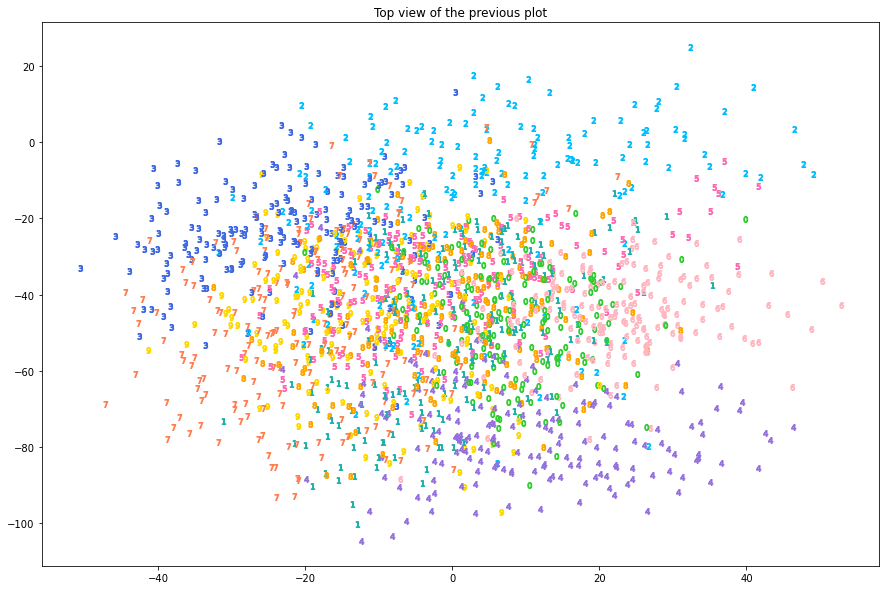

In [52]:
plt.figure(figsize=(15, 10))

for i in range(X_new.shape[0]):
    plt.scatter(X_new[i, 1], X_new[i, 0], c = colors[digits.target[i]], marker = number[digits.target[i]])

plt.title('Top view of the previous plot')
plt.show()

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
In general, we saw that reducing the dimension using random Gaussian projections also gives a result. But this result strongly depends on chance (it's not for nothing that they are called random) and, based on my experiments, it is worse than the method with SVD. But I drew a beautiful three-dimensional picture while discovering that, so it was great to explore.

### Task 3. Covariance matrix and when SVD does not work.

**1.** Generate a sample of 1000 points $ x_1, \ldots, x_ {1000} $ from normal distribution with mean vector $ a = (0,0) $ and covariance matrix

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [53]:
points = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1, -2], [-2, 5]]), size = 2000)

**2.** 
Let's compute the singular value decomposition $ X = U \Sigma V^T $ and visualize all the points $ x_i $ and the directions of the new features. It is important that the directions of the new features roughly coincide with the directions of the semiaxes of the (almost) ellipse formed by the points.

/Users/aliyazaripova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


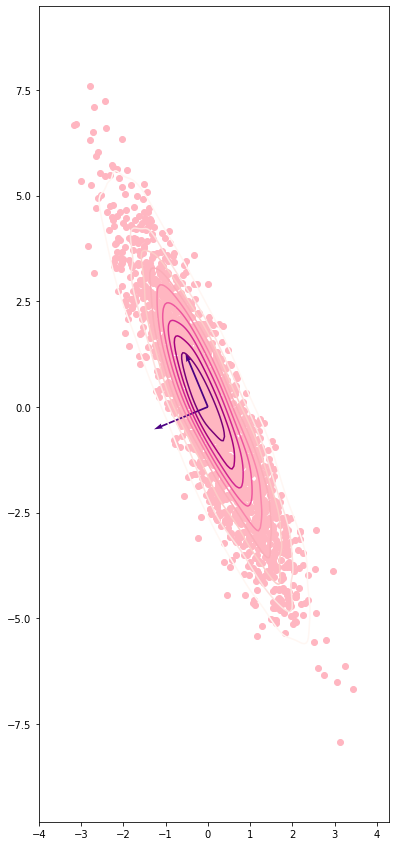

In [54]:
import seaborn as sns
import numpy as np

U, S, VT = svd(points, full_matrices=False)

plt.figure(figsize = (20, 15))
plt.scatter(points[:,0], points[:,1], color='lightpink')
sns.kdeplot(points[:,0], points[:,1], shade=False, cmap='RdPu')
X = [0, 0]
Y = [0, 0]
plt.quiver(X, Y, VT[:, 0], VT[:, 1], scale=6, width=0.005, color = 'indigo', linewidth=6)
plt.gca().set_aspect('equal')
plt.show()


As we could see, SVD copes well with its work when the data is distributed normally, but in other cases it can give completely less informative (or even inadequate) results. Here is an example.

**3.** Now we will generate a two-dimensional sample, which is two side-by-side long and narrow non-intersecting ellipses centered at $(-1,0)$ and $(1,0)$:

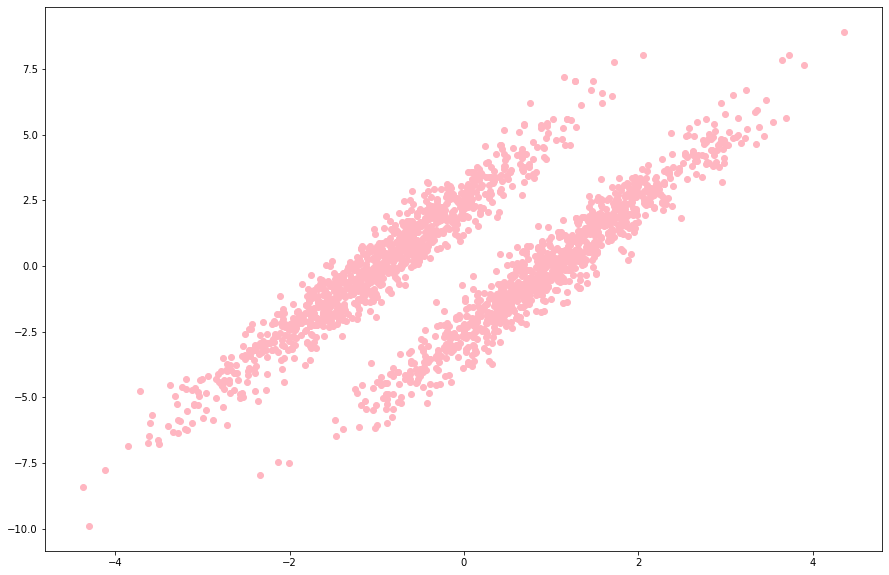

In [55]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
points_1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[1,2.5],[2.5,6.7]]), size = 1000)
points_2 = np.random.multivariate_normal(mean=np.array([1, 0]), cov=np.array([[1,2.5],[2.5,6.7]]), size = 1000)

points = np.concatenate((points_1, points_2), axis=0)

plt.figure(figsize = (15, 10))

plt.scatter(points[:,0], points[:,1], color='lightpink')
plt.show()

**4.** The singular value decomposition and the directions of the new features then would be following:

/Users/aliyazaripova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


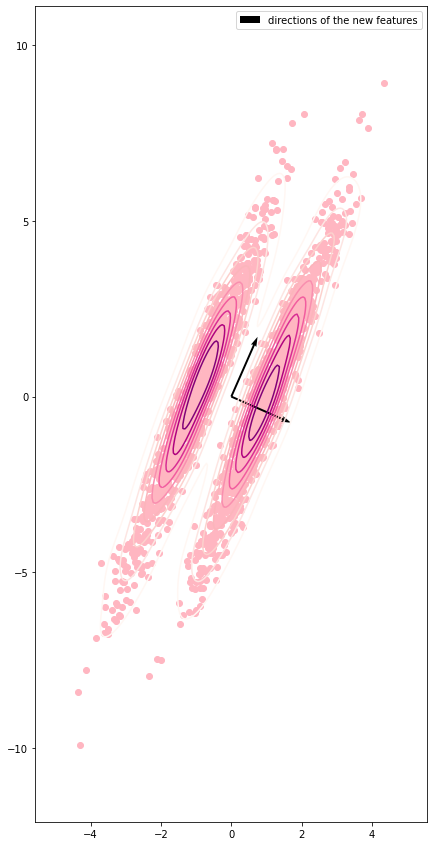

In [56]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

U, S, VT = svd(points)

plt.figure(figsize = (20, 15))

plt.scatter(points[:,0], points[:,1], color='lightpink')


plt.quiver(X, Y, VT[:, 0], VT[:, 1], scale=6, width=0.005, color = 'black', linewidth=6,  label='directions of the new features')
sns.kdeplot(points[:,0], points[:,1], shade=False, cmap='RdPu')
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

If we were solving the problem of data analysis, then most likely we were interested in a feature that would separate two clusters (in this case, two ellipses), that is, such a function $f(x)$ for which

$$f(x) < c,\ \mbox{if the object $x$ is from the first class}$$
$$f(x) > c,\ \mbox{if the object $x$ is from the second class}$$
for a certain number$c$.